### Libraries

In [1]:
# Determinadas
import numpy as np
import pandas
import matplotlib.pyplot as plt
import math

# Procesamiento de imágenes
import numpy as np
import cv2

### <br><br><br><br><br><br>Functions

In [2]:
def regionGrow(img, img_G, seedStack):
    # Obtener la forma de la imagen.
    nrows, ncols = img.shape
    
    while len(seedStack) != 0:
        # Obtener la semilla.
        seed = seedStack.pop()
    
        # Obtener 'x' y 'y' de la semilla.
        x = seed[0]
        y = seed[1]

        # Marcar el punto de la semilla.
        img_G[x,y] = 1
        
        if( y+1 < ncols and img_G[x,y+1] == 0 and img[x,y+1] == 1):
            seedStack.append([x,y+1])
        if( y-1 >= 0 and img_G[x,y-1] == 0 and img[x,y-1] == 1):
            seedStack.append([x,y-1])
        if( x+1 < nrows and img_G[x+1,y] == 0 and img[x+1,y] == 1):
            seedStack.append([x+1,y])
        if( x-1 >= 0 and img_G[x-1,y] == 0 and img[x-1,y] == 1):
            seedStack.append([x-1,y])
            
    return img_G

In [3]:
def countCells(img, kernel):
    # Contador de células.
    cells_count = 0
    
    # Obtener forma de la máscara.
    h_kernel, w_kernel = kernel.shape
    
    # Obtener forma de la imagen.
    h, w = img.shape
    
    # Nueva imagen aumentada.
    extended_mat = np.zeros((h+h_kernel-1,w+w_kernel-1), dtype=int)
    
    # Crear nueva imagen totalmente negra para el region growing.
    img_G = np.zeros_like(extended_mat)
    
    # Obtener pisos de las dimensiones de la máscara.
    h_floor = math.floor(h_kernel/2)
    w_floor = math.floor(w_kernel/2)
    
    # Rellenar matriz aumentada.
    extended_mat[ h_floor:h+h_floor, w_floor:w+w_floor ] = img
    
    for i in range(h+h_kernel-1):
        for j in range(w+w_kernel-1):
            if (i >= h_floor and i < h+h_floor) and (j >= w_floor and j < w+w_floor):
                # Obtener región.
                region = extended_mat[i-h_floor:i+h_floor+1, j-w_floor:j+w_floor+1]
                
                # Si hay un fit.
                if (region==kernel).all() and img_G[i,j] == 0:
                    # Aumentar contador.
                    cells_count += 1
                    
                    # Crear semilla.
                    seed = [i,j]
                    
                    # Stack de semillas.
                    seedStack = []
                    seedStack.append(seed)
                    
                    # Llamar region growing.
                    img_G = regionGrow(extended_mat, img_G, seedStack)
                    
                    # Mostrar imagen.
                    plt.figure(figsize=(7,7))
                    plt.imshow(img_G, cmap="gray")
                    plt.show()
                    
    return cells_count

In [4]:
def dilate(img, kernel):
    # Obtener forma de la máscara.
    h_kernel, w_kernel = kernel.shape
    
    # Obtener forma de la imagen.
    h, w = img.shape
    
    # Nueva imagen resultado.
    newImg = np.zeros_like(img)
    
    # Nueva imagen aumentada.
    extended_mat = np.zeros((h+h_kernel-1,w+w_kernel-1), dtype=int)
    
    # Obtener pisos de las dimensiones de la máscara.
    h_floor = math.floor(h_kernel/2)
    w_floor = math.floor(w_kernel/2)
    
    # Rellenar matriz aumentada.
    extended_mat[ h_floor:h+h_floor, w_floor:w+w_floor ] = img
    
    for i in range(h+h_kernel-1):
        for j in range(w+w_kernel-1):
            if (i >= h_floor and i < h+h_floor) and (j >= w_floor and j < w+w_floor):
                # Obtener región.
                region = extended_mat[i-h_floor:i+h_floor+1, j-w_floor:j+w_floor+1]
                
                # Restar matrices.
                imgCheck = kernel - region
                
                # Contar número de ceros.
                non_zero_count = np.count_nonzero(imgCheck==0)

                # Si hay un hit.
                if non_zero_count > 0:
                    # Encender el pixel.
                    newImg[i-h_floor,j-w_floor] = 1
                else:
                    # Apagar el pixel.
                    newImg[i-h_floor,j-w_floor] = 0
                
    return newImg

In [5]:
def erode(img, kernel):
    # Suma total del kernel.
    total_sum = np.sum(kernel)
    
    # Obtener forma de la máscara.
    h_kernel, w_kernel = kernel.shape
    
    # Obtener forma de la imagen.
    h, w = img.shape
    
    # Nueva imagen resultado.
    newImg = np.zeros_like(img)
    
    # Nueva imagen aumentada.
    extended_mat = np.zeros((h+h_kernel-1,w+w_kernel-1), dtype=int)
    
    # Obtener pisos de las dimensiones de la máscara.
    h_floor = math.floor(h_kernel/2)
    w_floor = math.floor(w_kernel/2)
    
    # Rellenar matriz aumentada.
    extended_mat[ h_floor:h+h_floor, w_floor:w+w_floor ] = img
    
    
    
    for i in range(h+h_kernel-1):
        for j in range(w+w_kernel-1):
            if (i >= h_floor and i < h+h_floor) and (j >= w_floor and j < w+w_floor):
                # Obtener región.
                region = extended_mat[i-h_floor:i+h_floor+1, j-w_floor:j+w_floor+1]
                
                # Restar matrices.
                imgCheck = kernel - region # (13x13) 
                
                # Contar número de ceros.
                non_zero_count = np.count_nonzero(imgCheck==0)

                # Si hay un fit.
                if non_zero_count == total_sum:
                    # Encender el pixel.
                    newImg[i-h_floor,j-w_floor] = 1
                else:
                    # Apagar el pixel.
                    newImg[i-h_floor,j-w_floor] = 0
                
    return newImg

In [6]:
def opening(img, kernel, it=1):
    newImg = img.copy()
    
    for i in range(it):
        newImg = dilate(erode(newImg.copy(), kernel).copy(), kernel)
        
    return newImg

### <br><br><br><br><br><br>Load Image

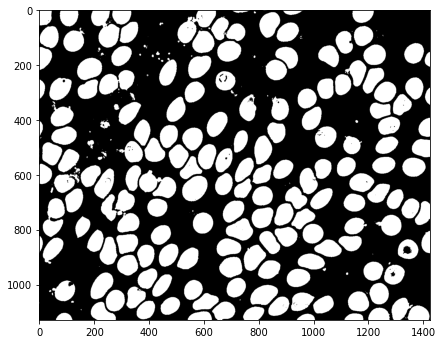

In [7]:
# Cargar imagen.
img = cv2.imread('Datasets/Blood cells.jpg')

# Imagen a escala de grises.
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Copiar imagen original.
imgT = np.zeros_like(img) 

# Umbralización.
threshold = 200
white_mask = img > threshold
cells_mask = img <= threshold

# Binarizar.
imgT[white_mask] = 0
imgT[cells_mask] = 1

# Mostrar imagen.
plt.figure(figsize=(7,7))
plt.imshow(imgT, cmap="gray")
plt.show()

### Remove noise

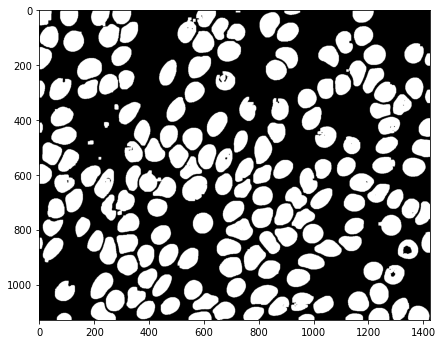

In [8]:
# Custom kernel.
kernel = np.ones((9,9), dtype=int)

# A np array.
kernel = np.asarray(kernel)

# Open.
newImg = opening(imgT.copy(), kernel, it=1)

# Mostrar imagen.
plt.figure(figsize=(7,7))
plt.imshow(newImg, cmap="gray")
plt.show()

### Results

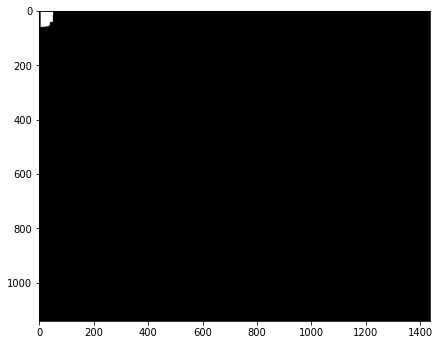

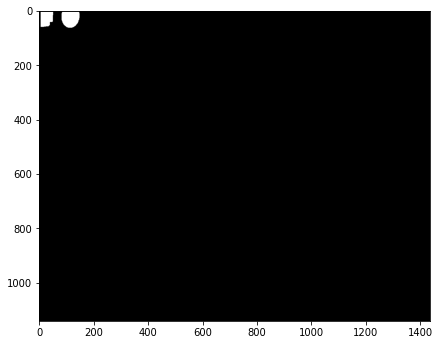

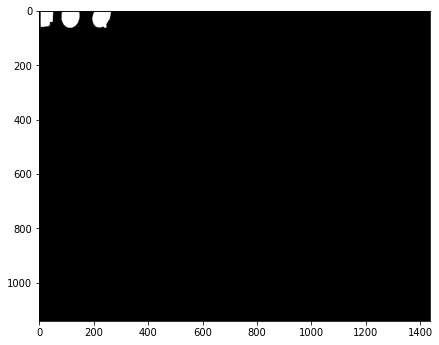

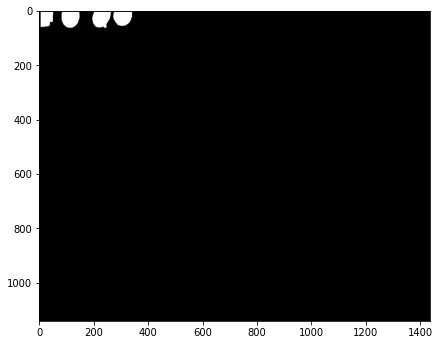

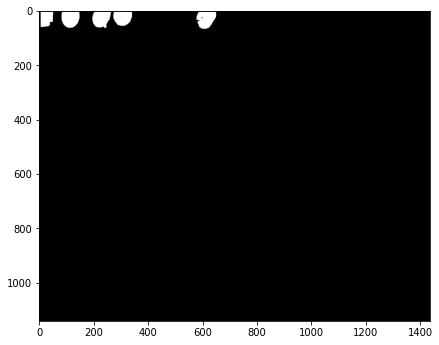

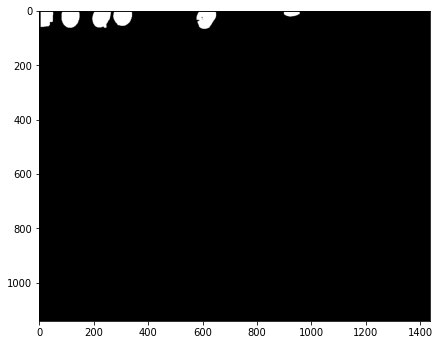

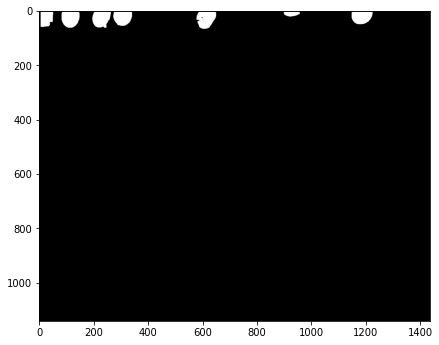

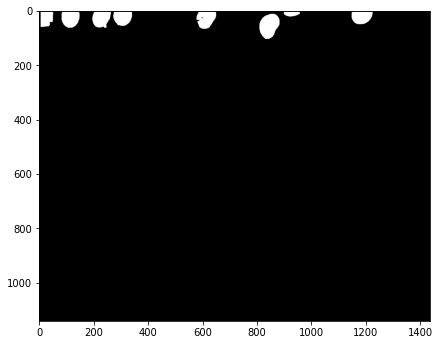

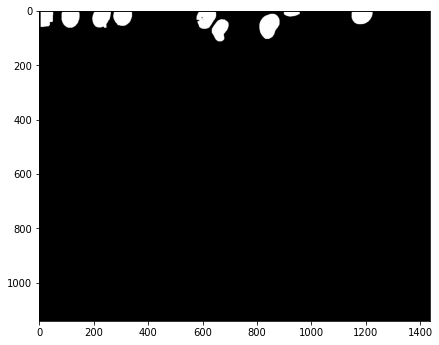

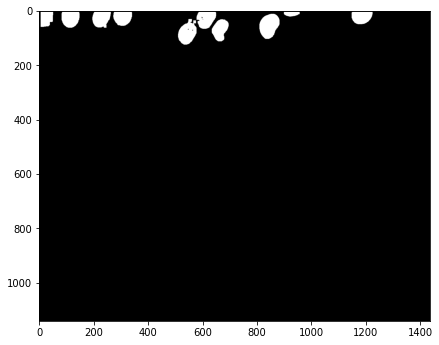

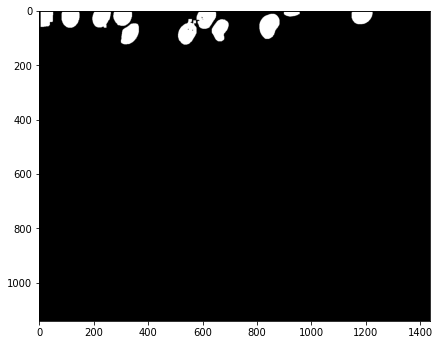

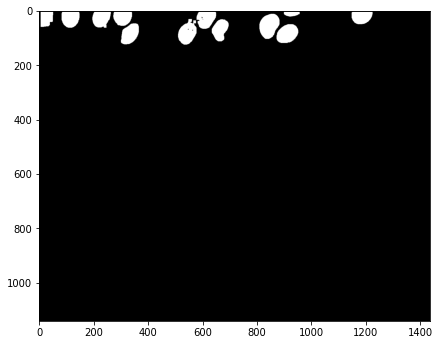

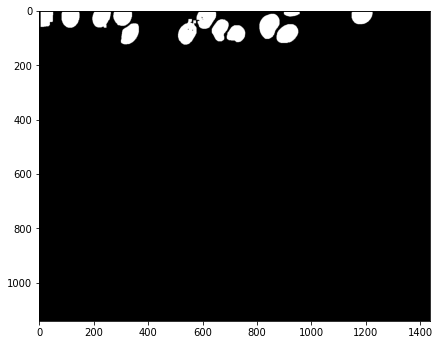

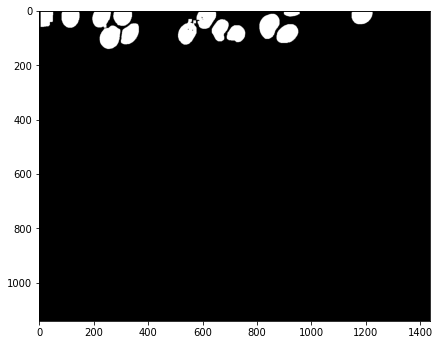

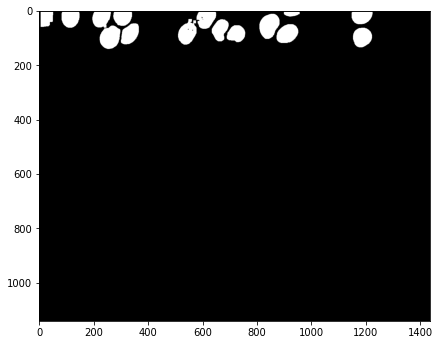

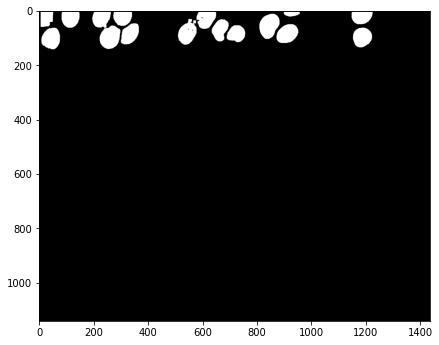

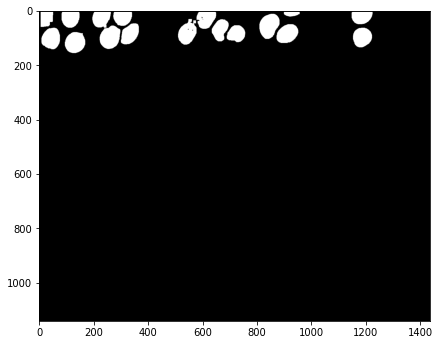

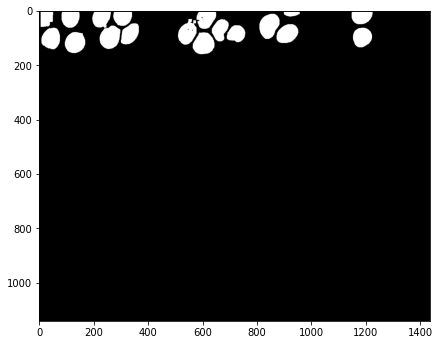

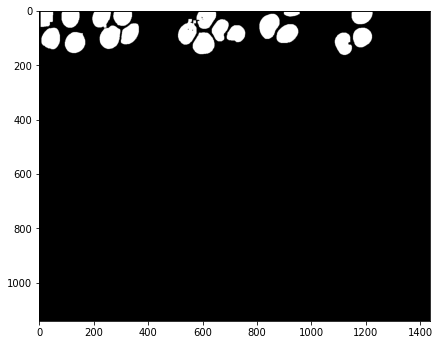

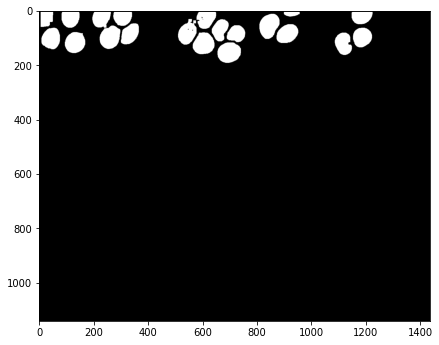

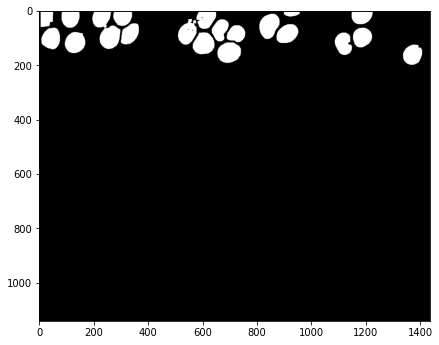

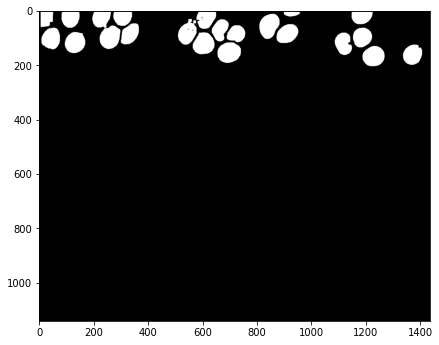

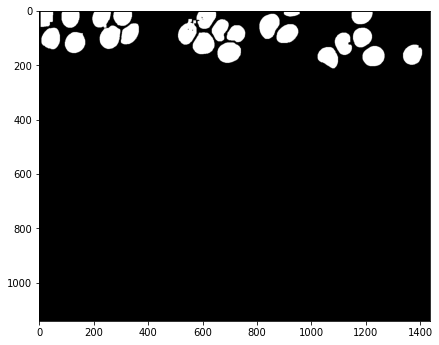

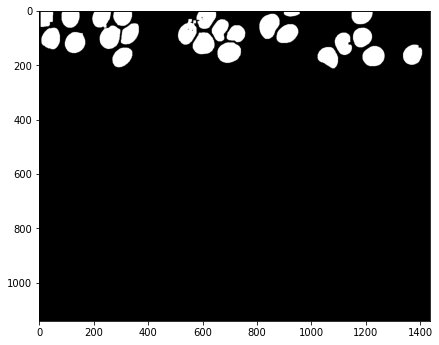

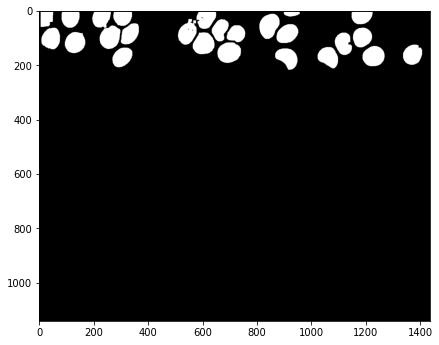

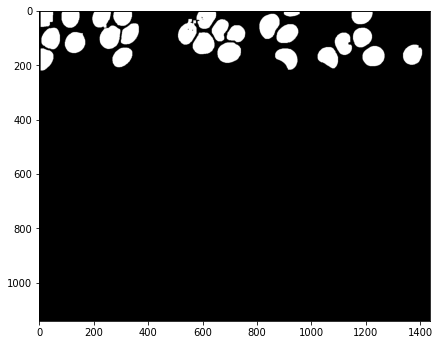

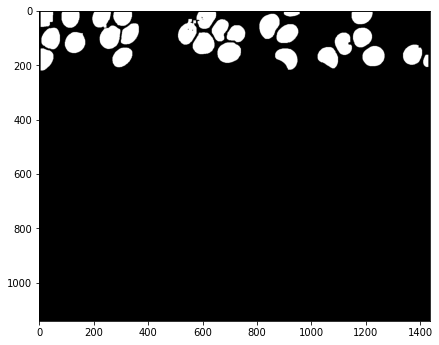

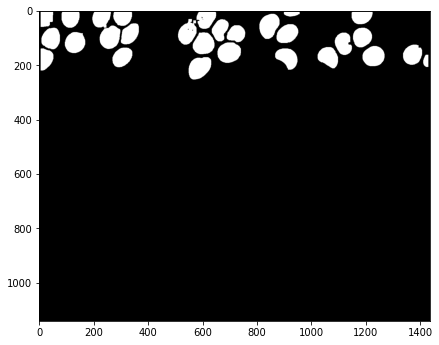

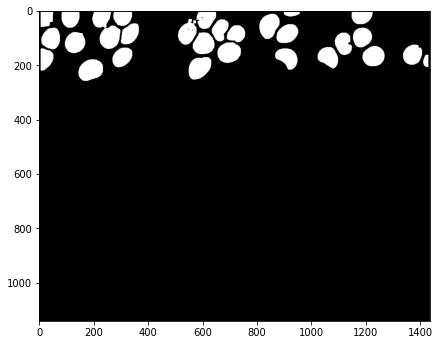

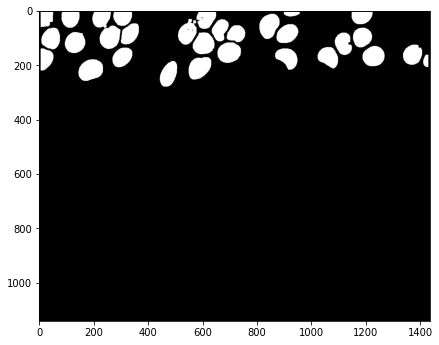

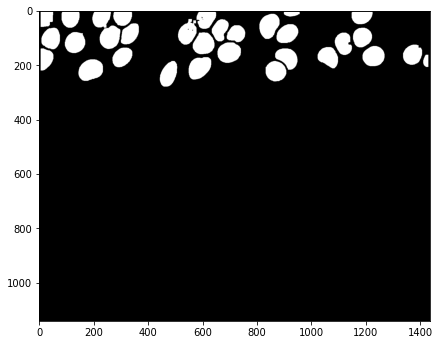

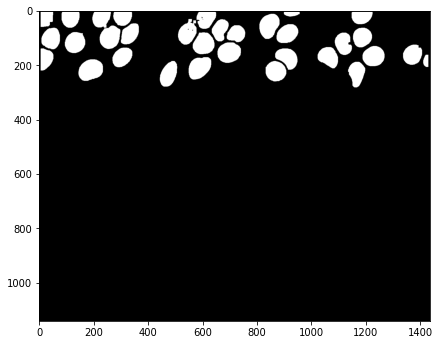

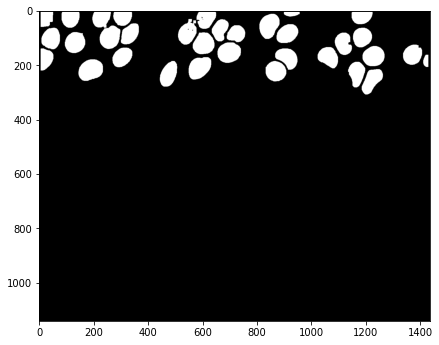

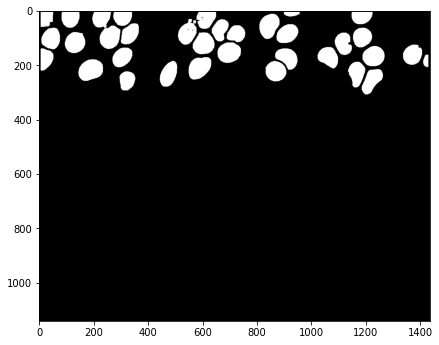

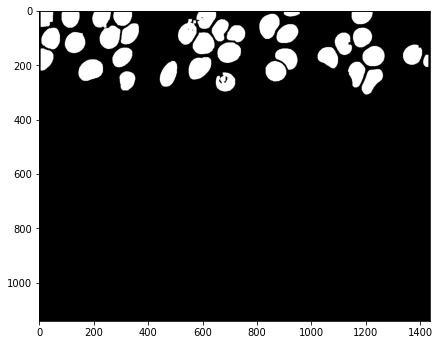

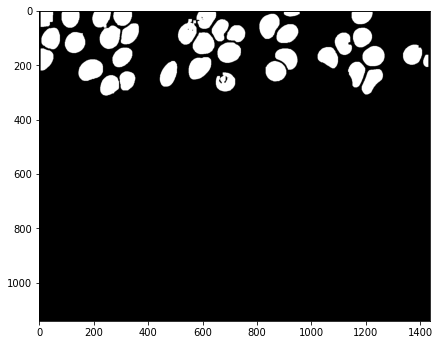

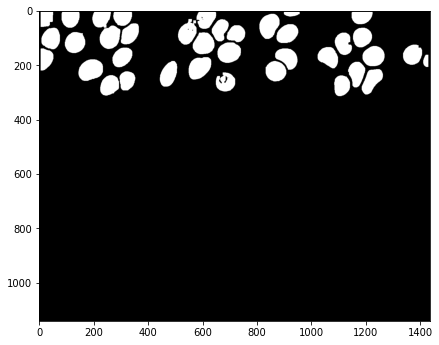

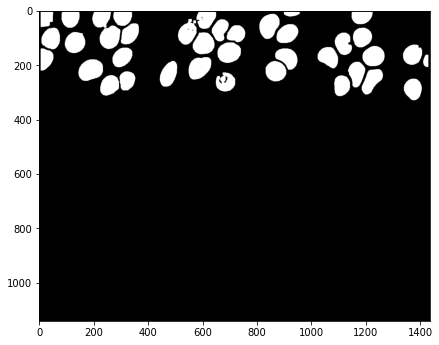

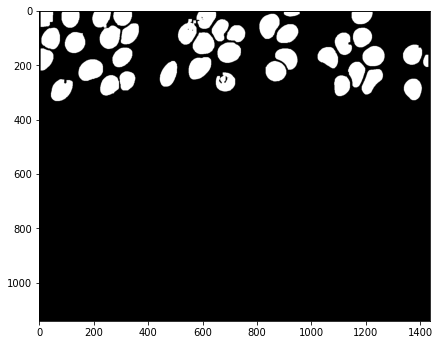

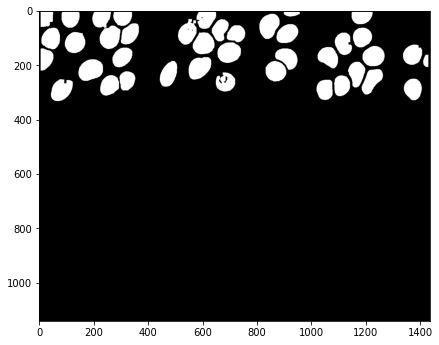

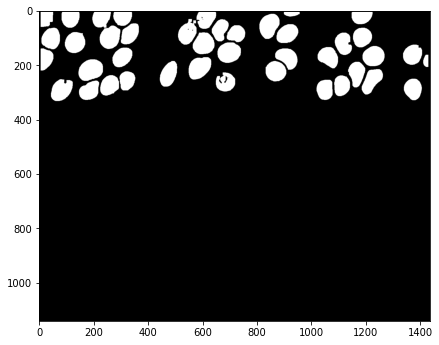

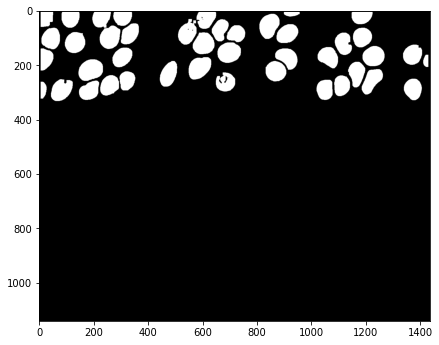

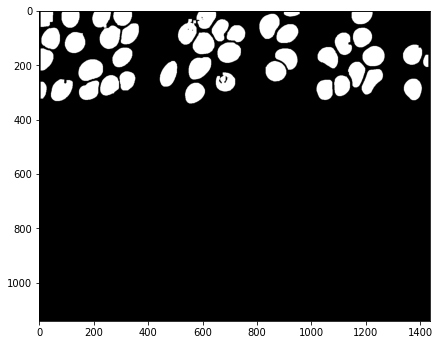

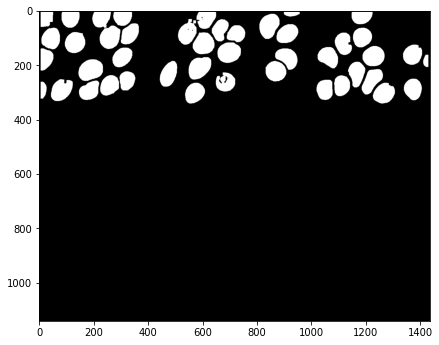

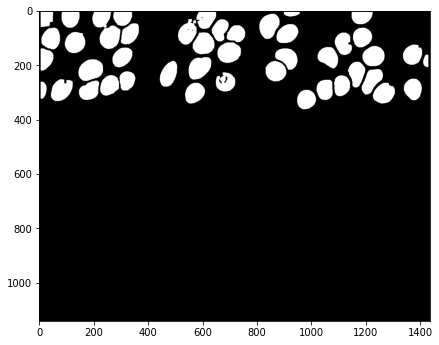

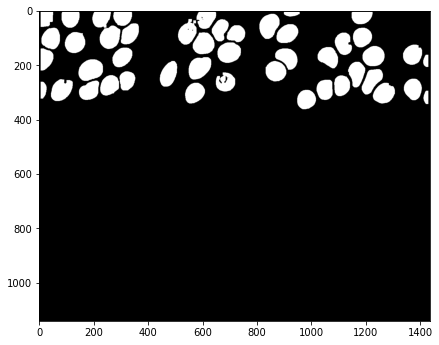

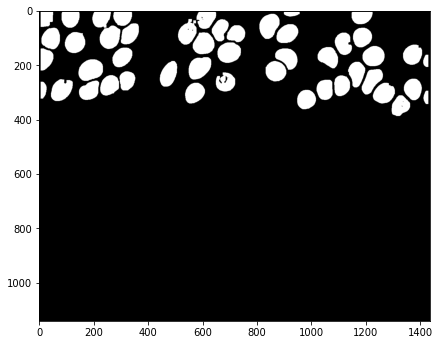

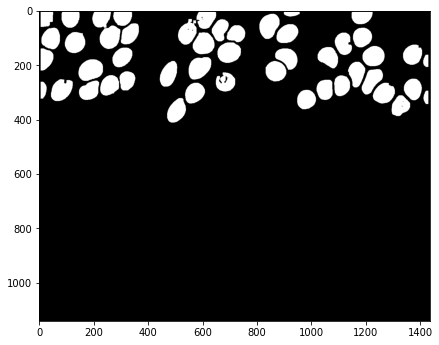

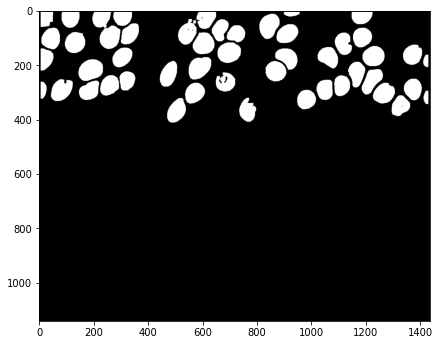

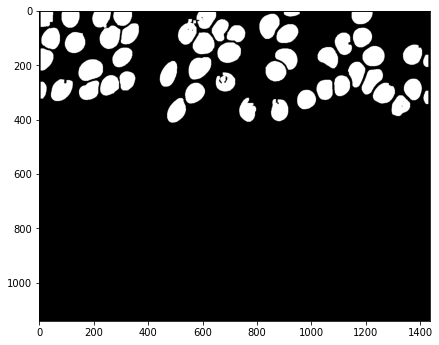

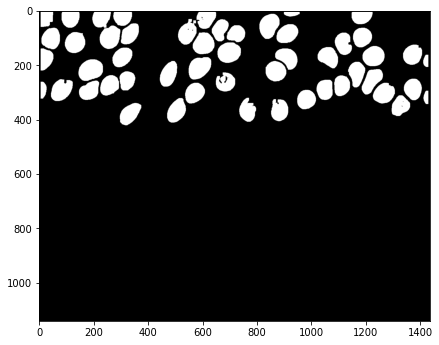

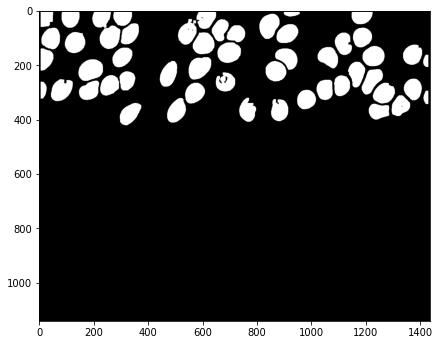

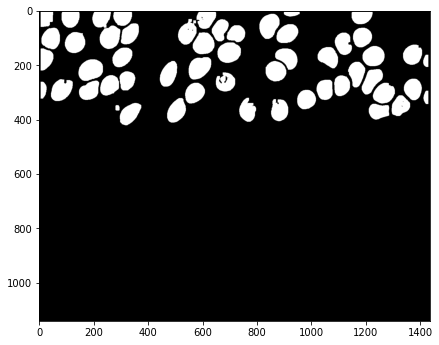

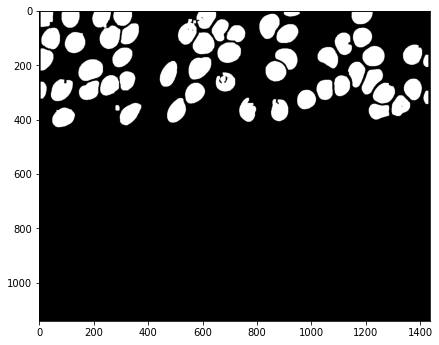

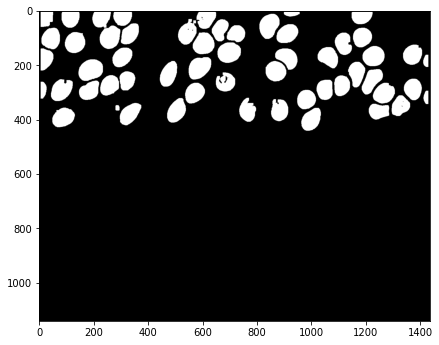

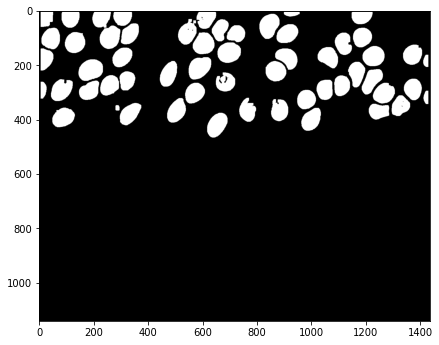

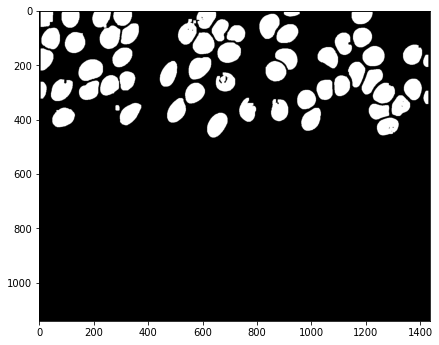

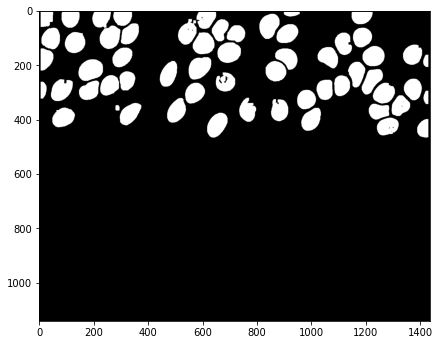

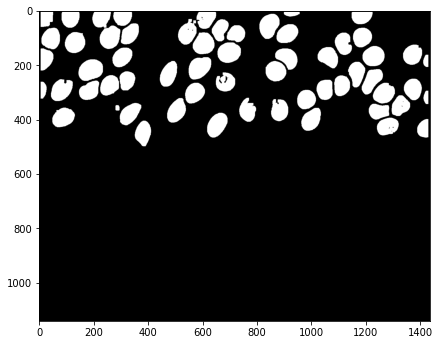

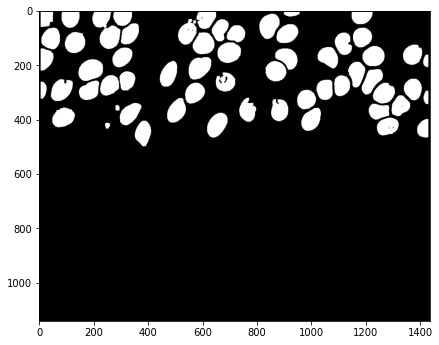

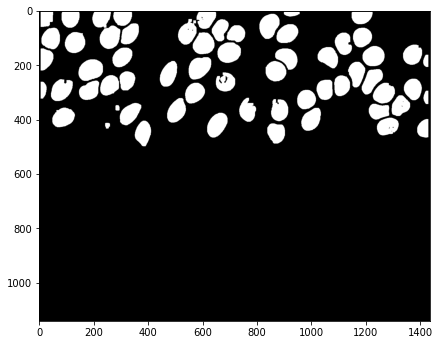

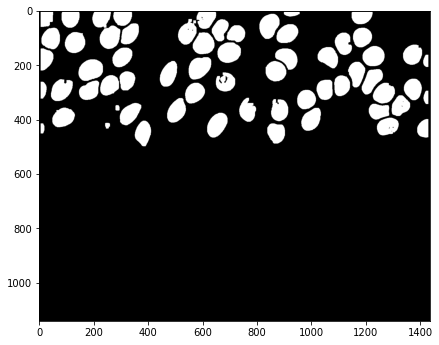

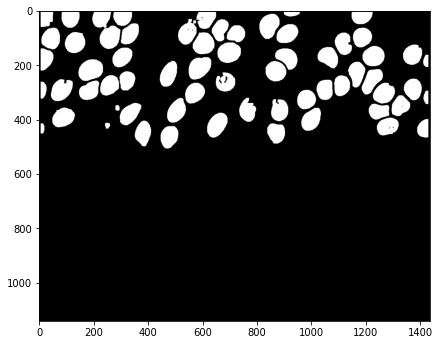

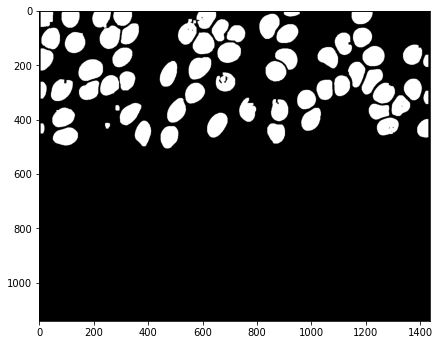

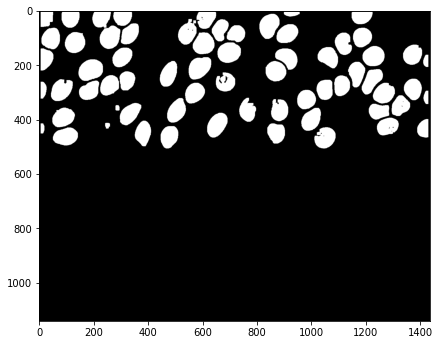

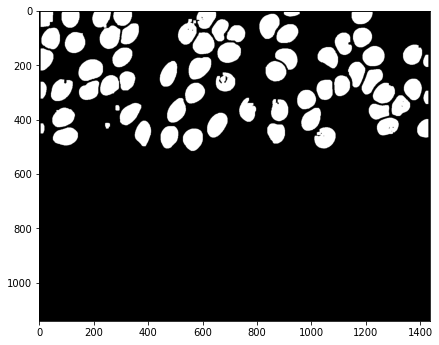

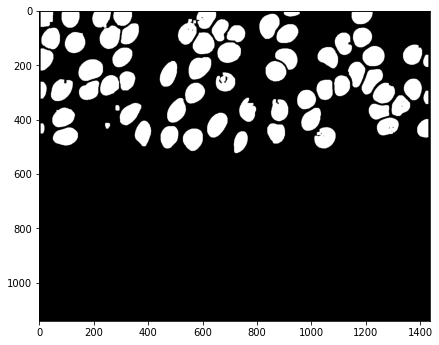

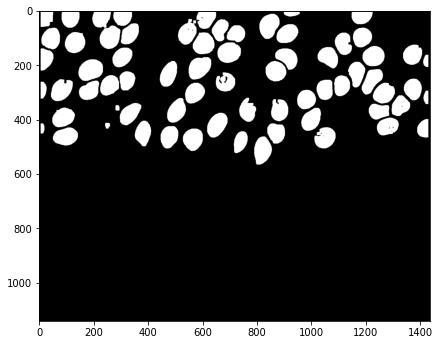

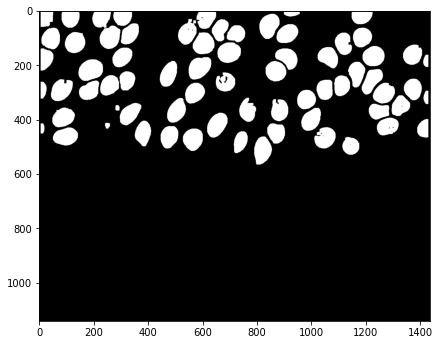

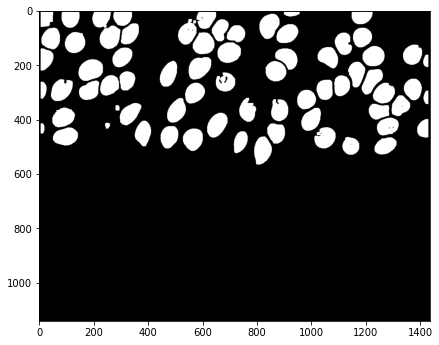

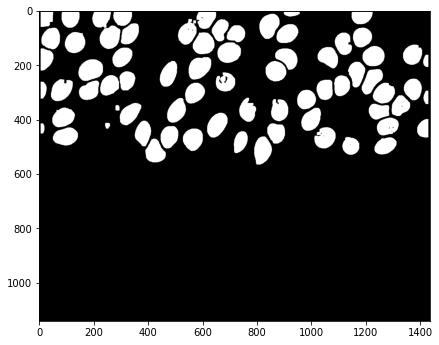

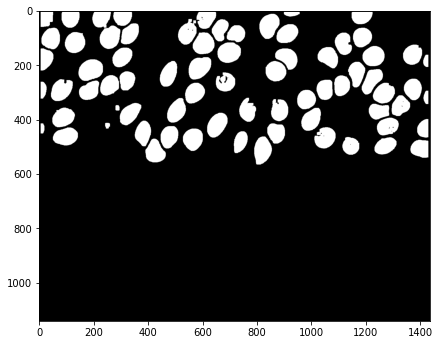

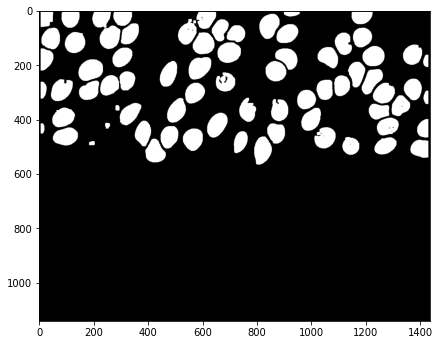

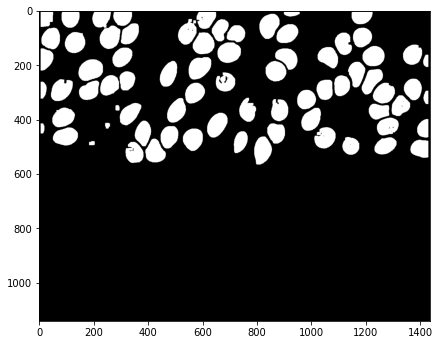

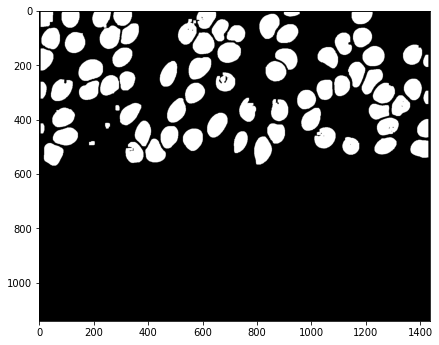

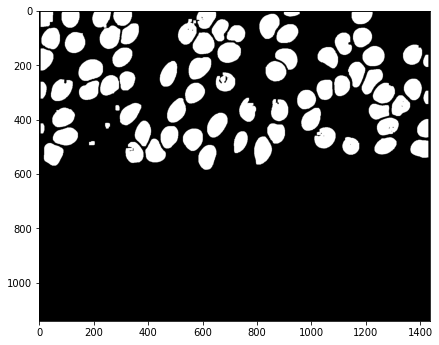

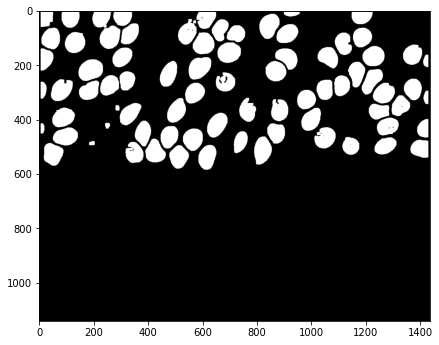

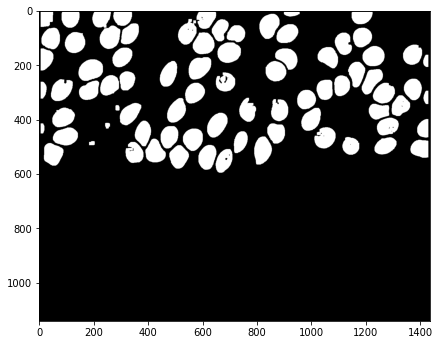

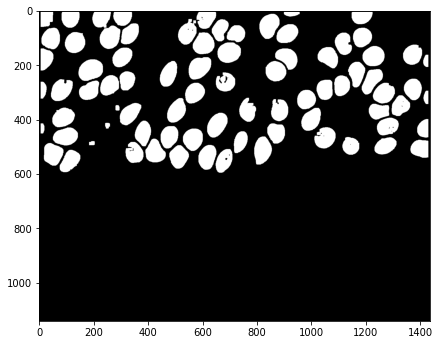

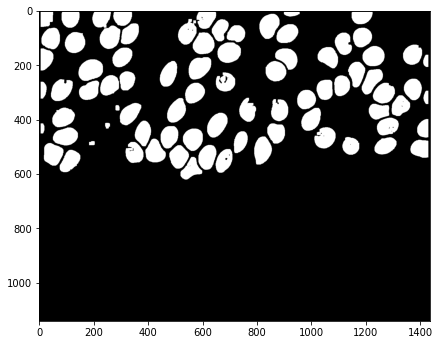

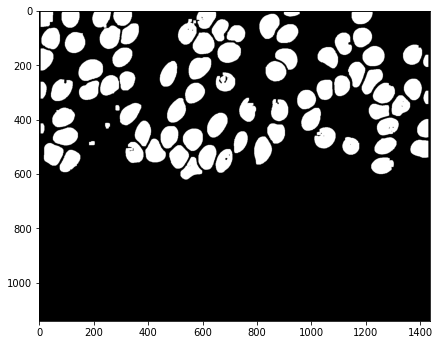

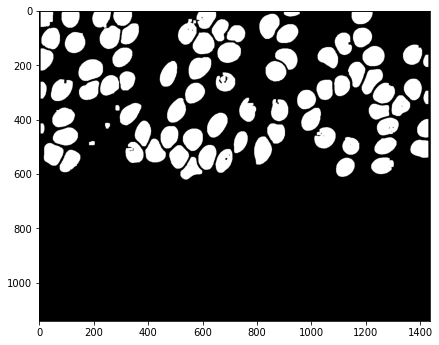

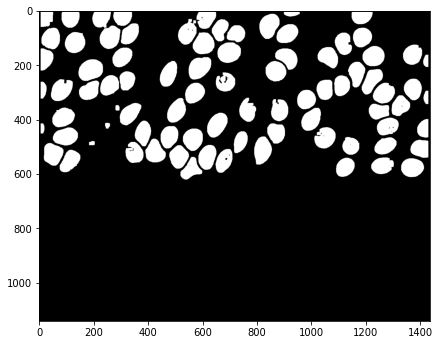

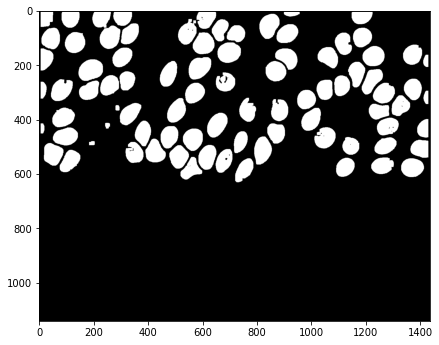

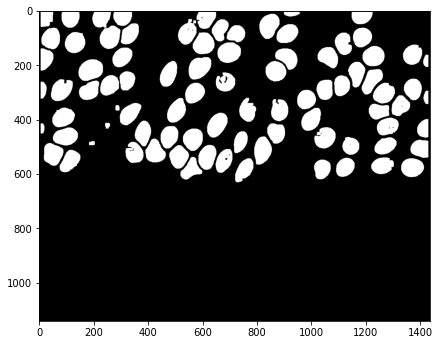

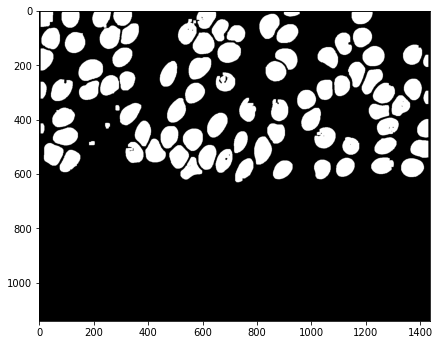

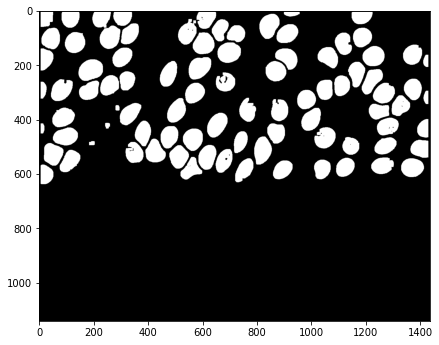

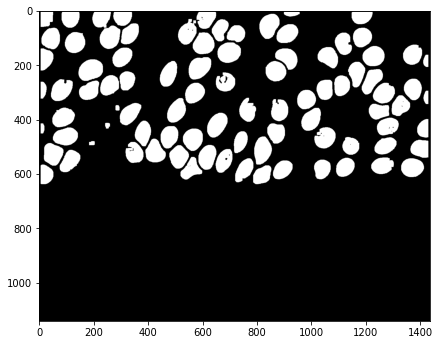

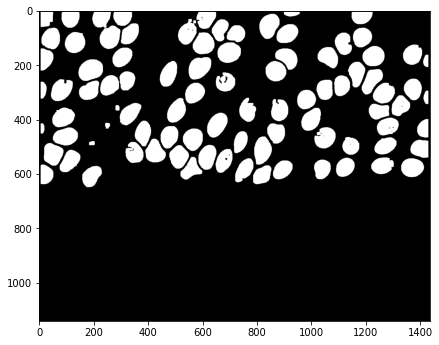

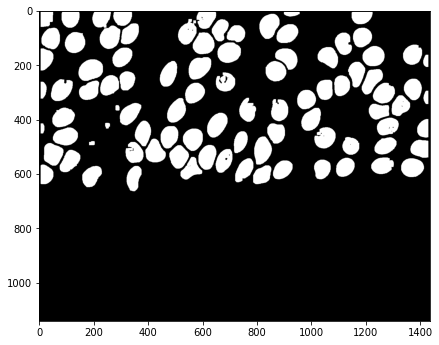

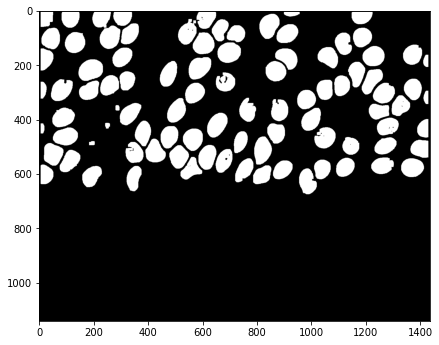

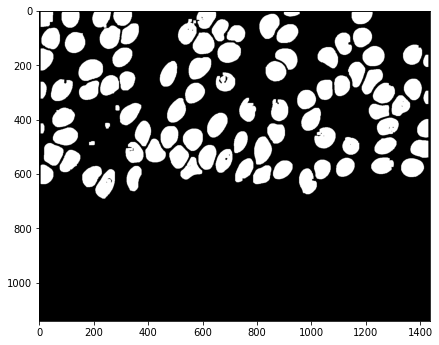

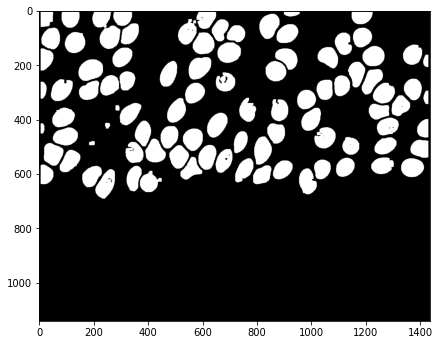

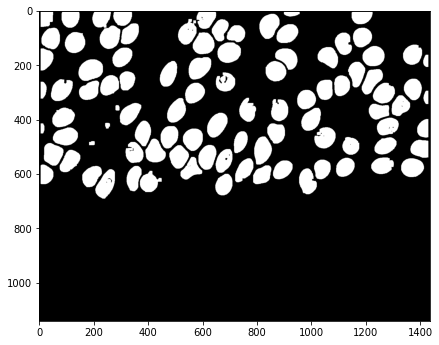

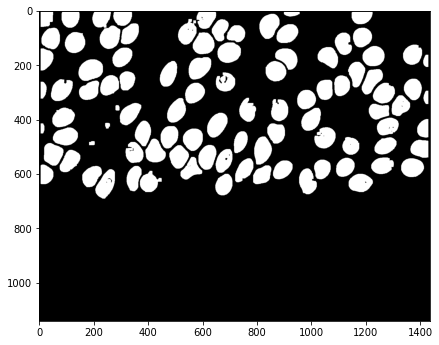

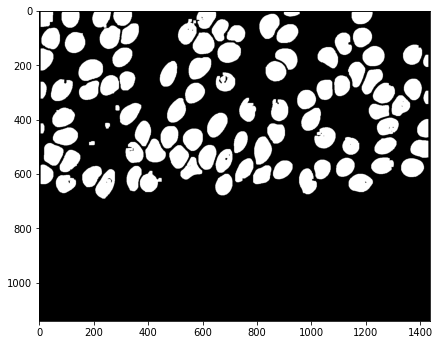

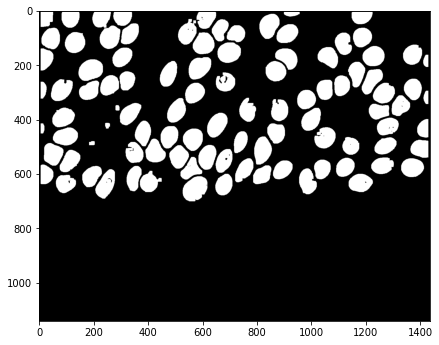

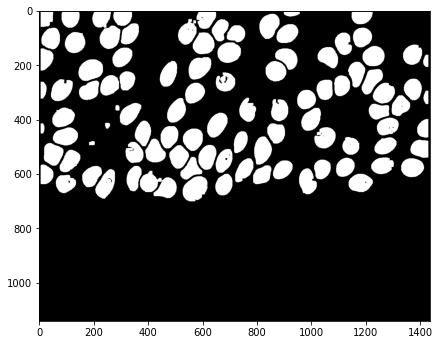

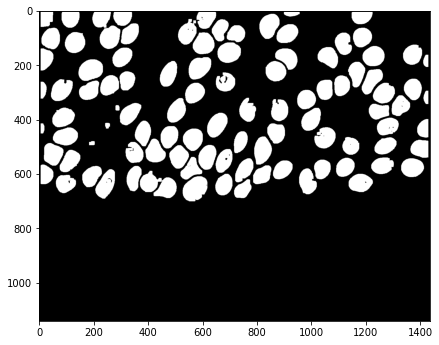

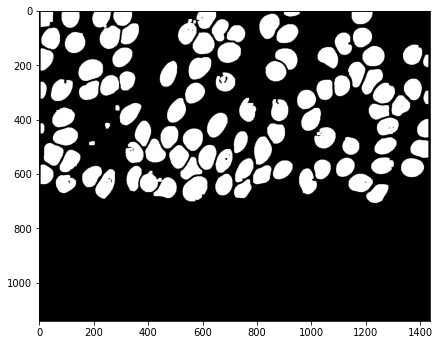

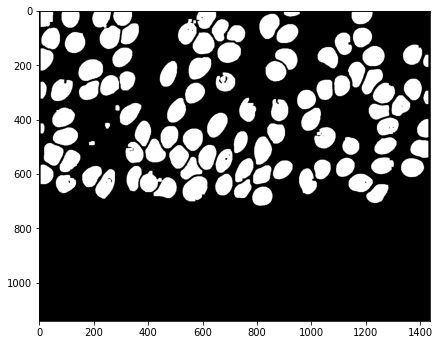

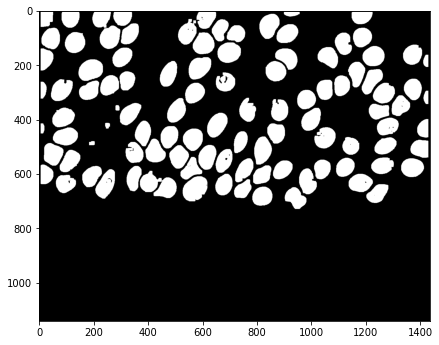

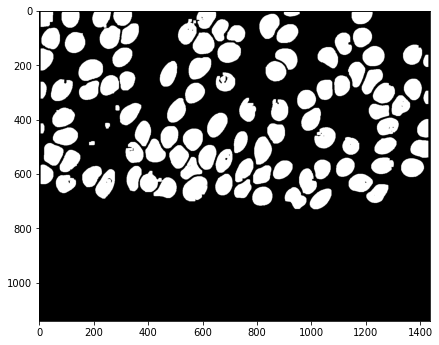

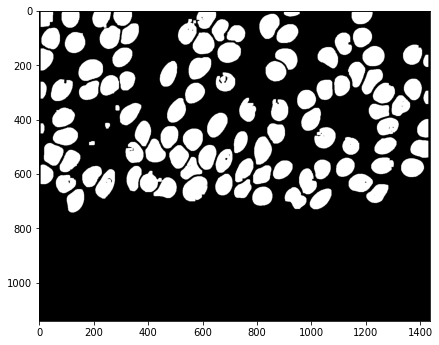

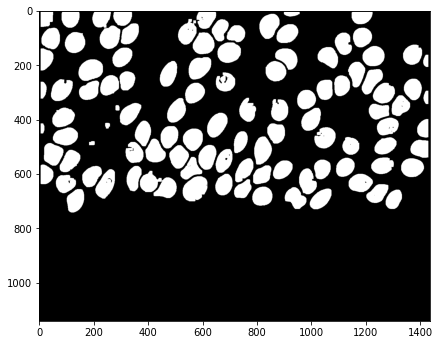

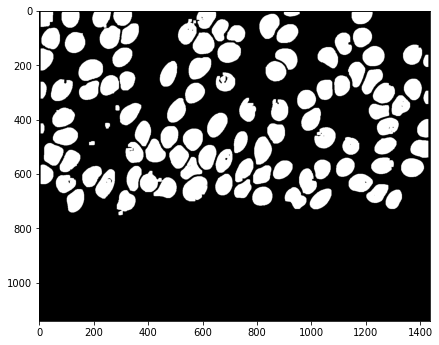

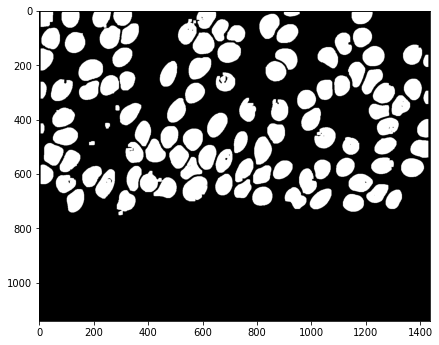

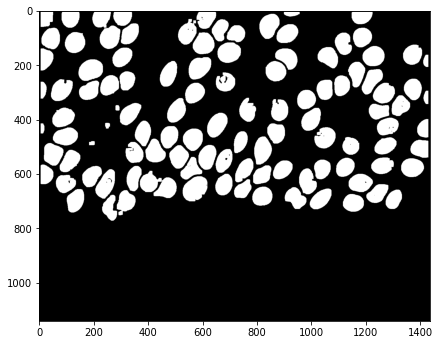

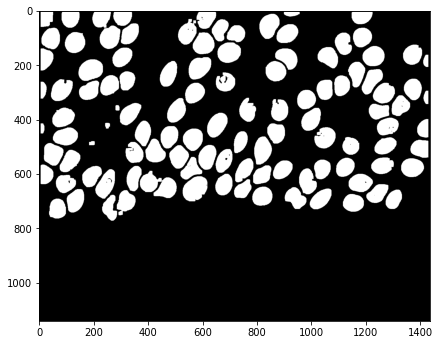

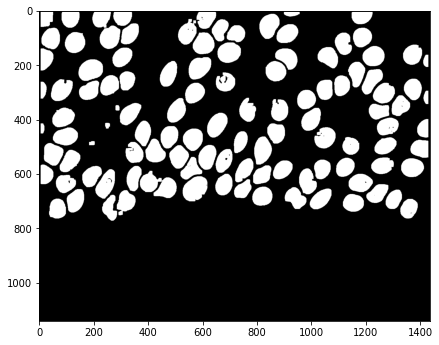

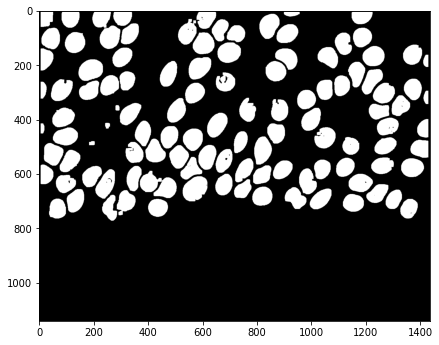

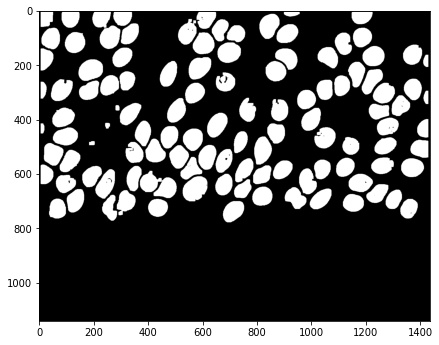

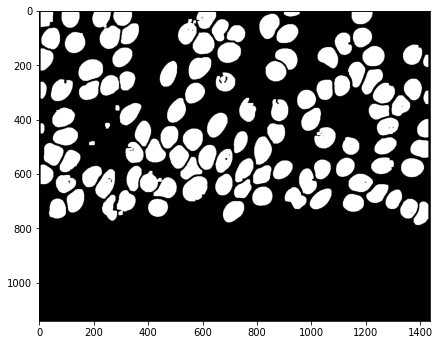

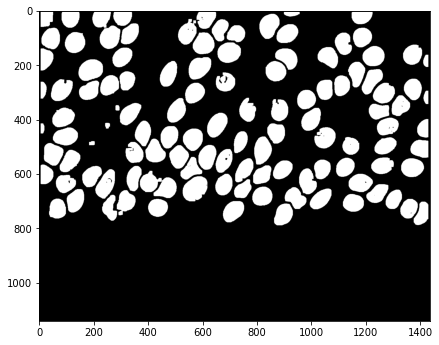

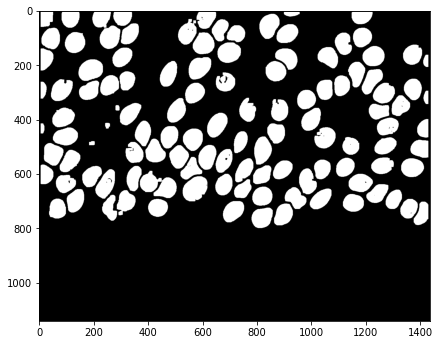

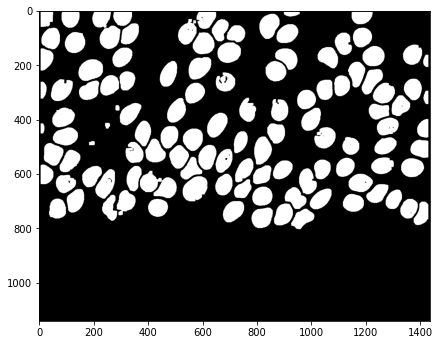

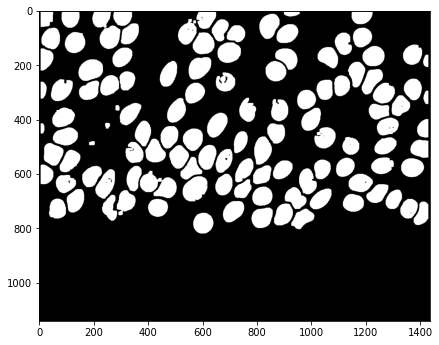

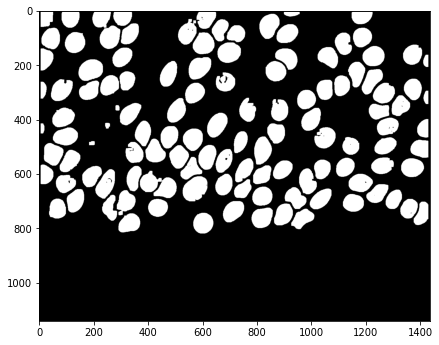

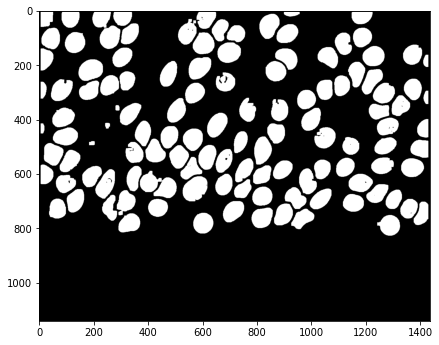

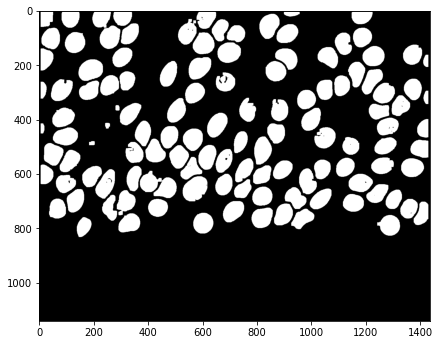

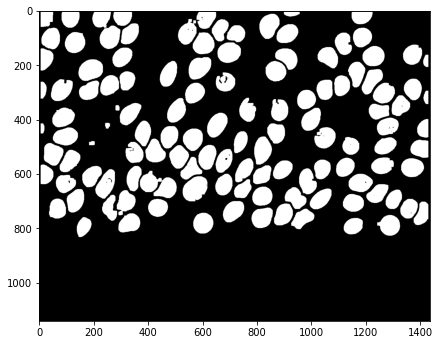

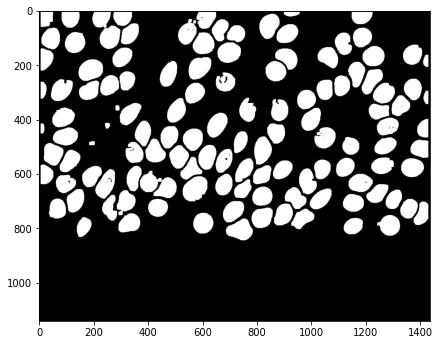

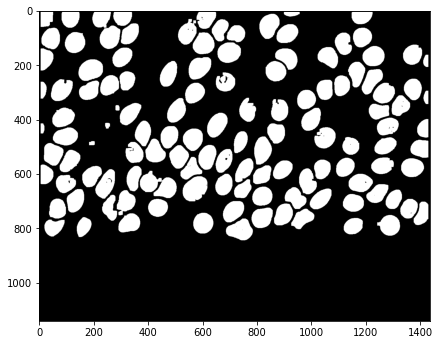

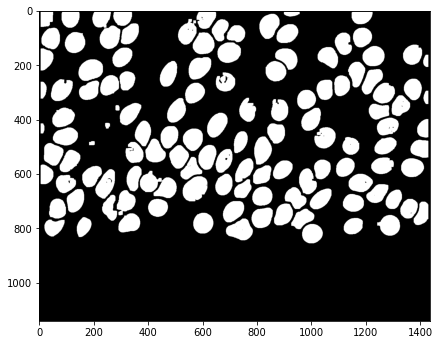

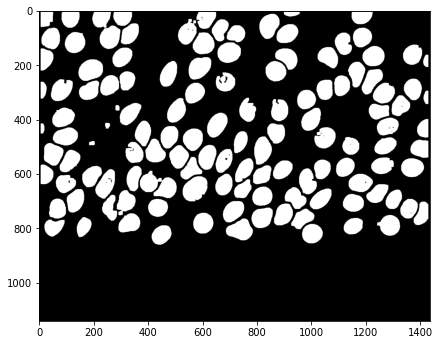

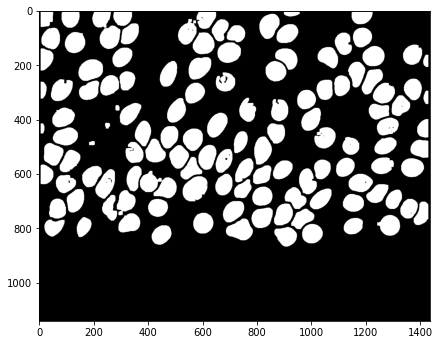

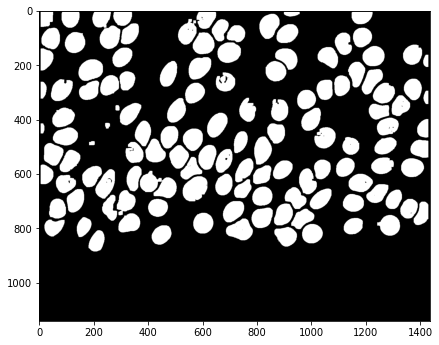

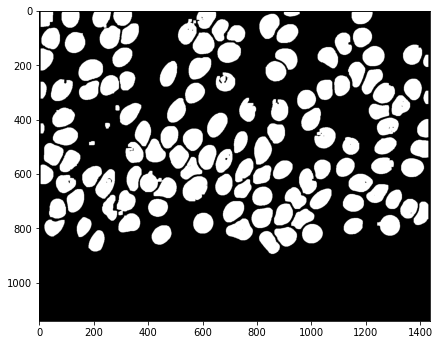

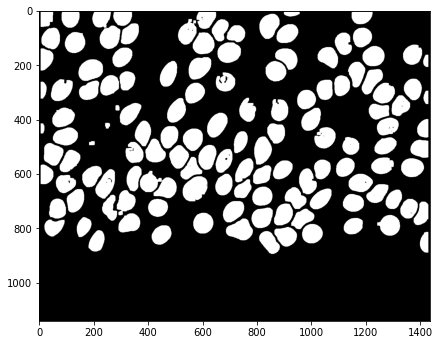

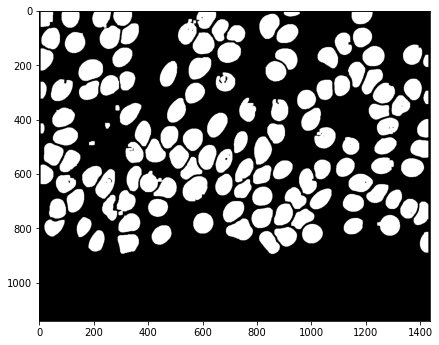

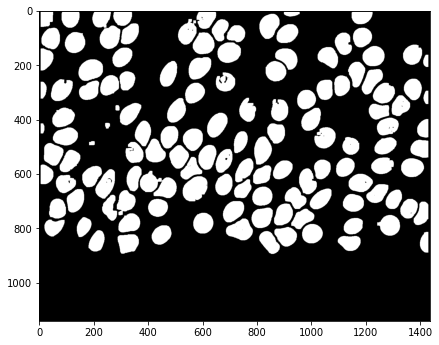

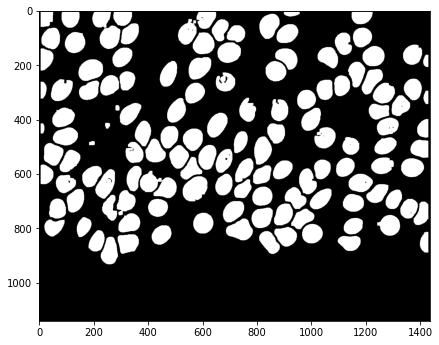

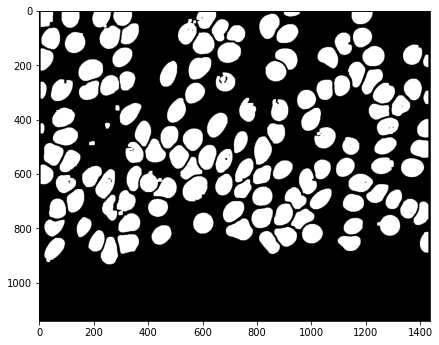

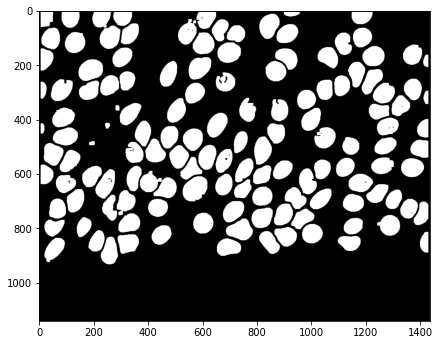

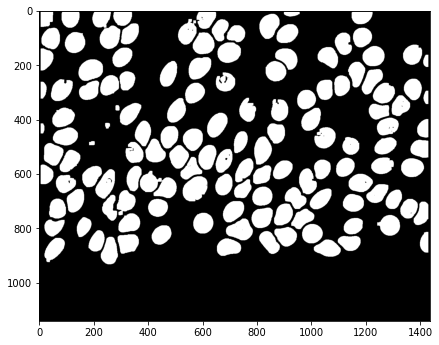

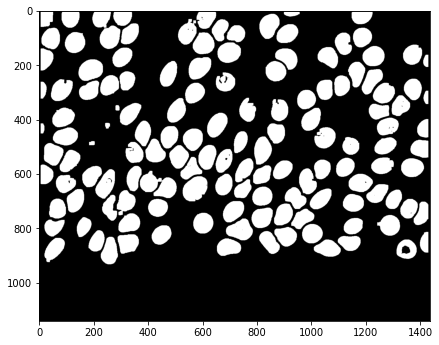

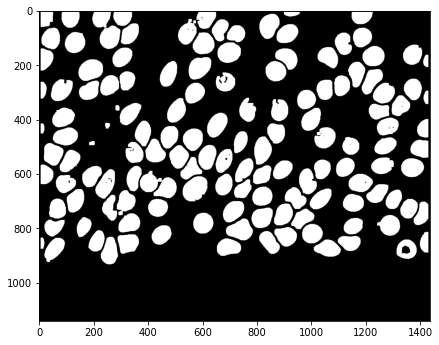

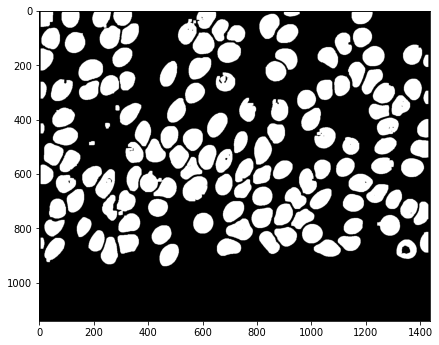

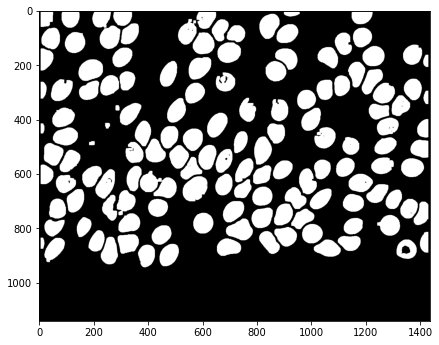

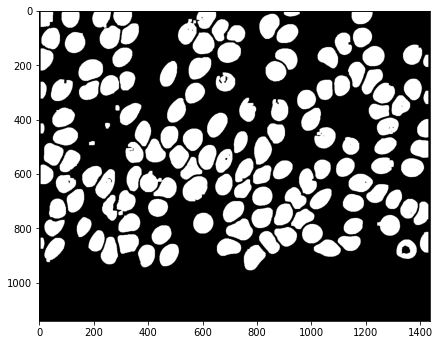

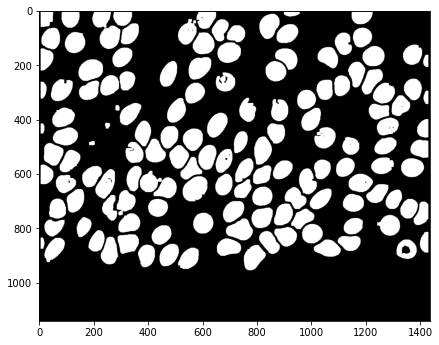

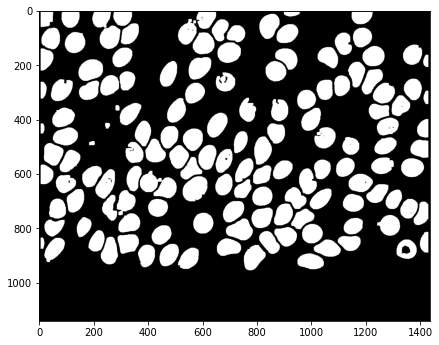

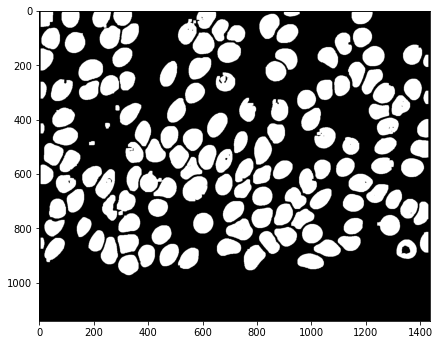

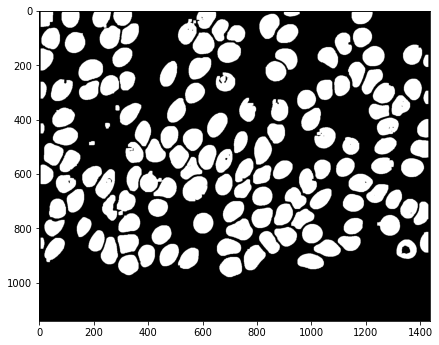

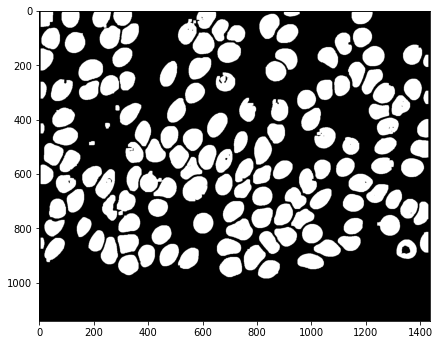

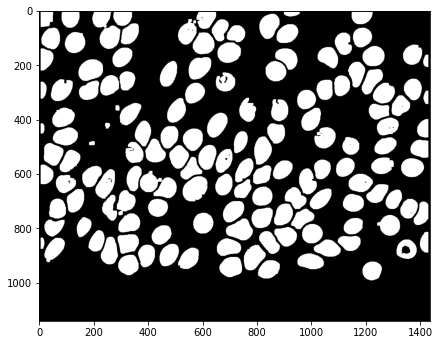

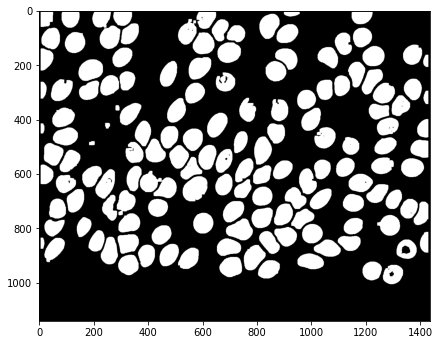

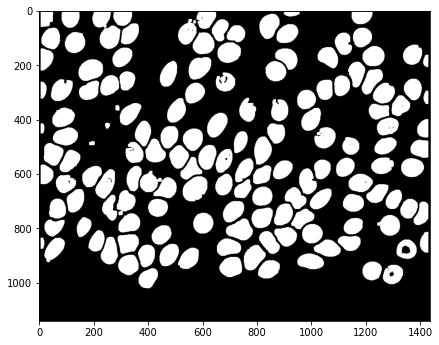

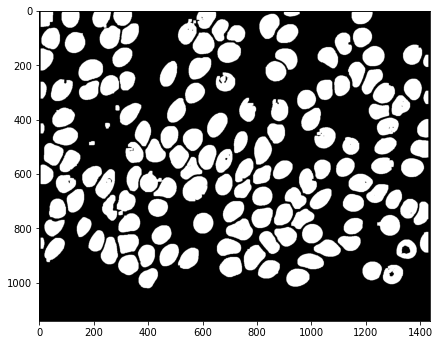

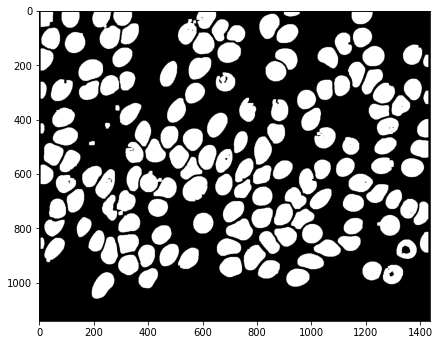

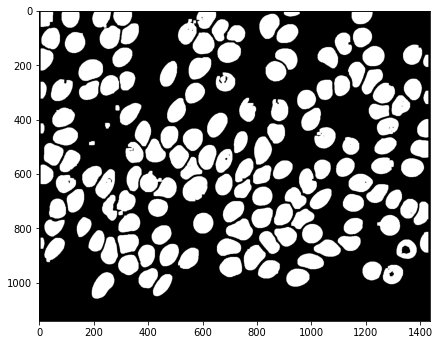

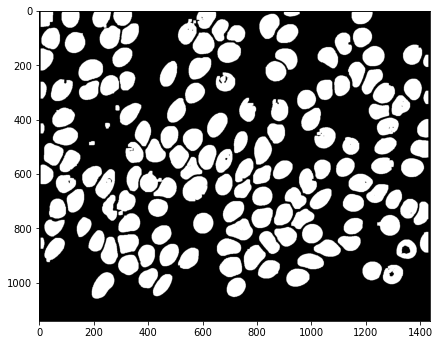

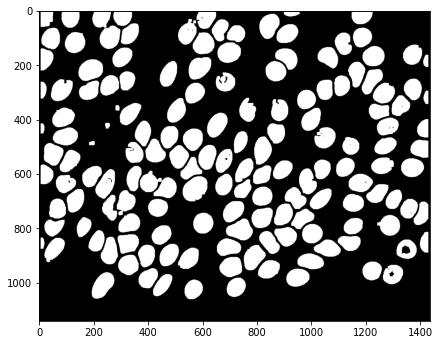

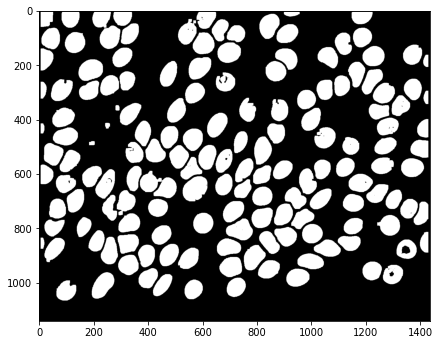

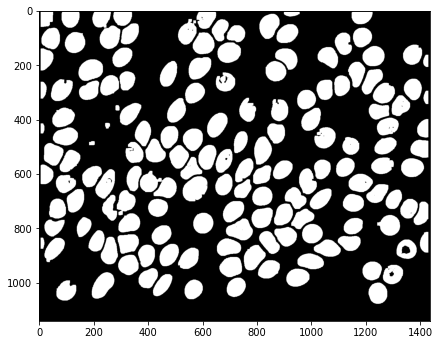

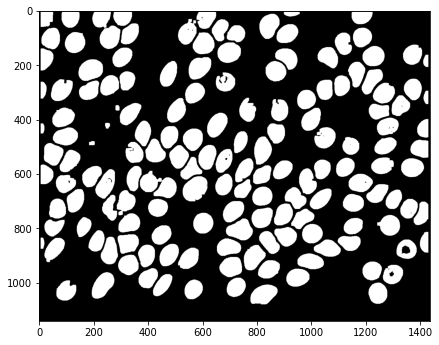

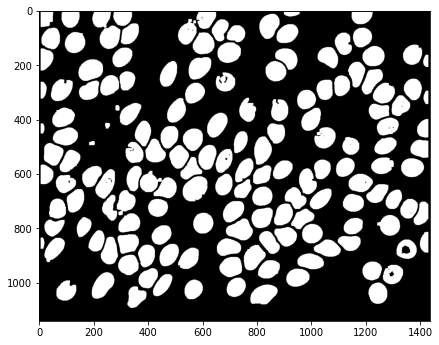

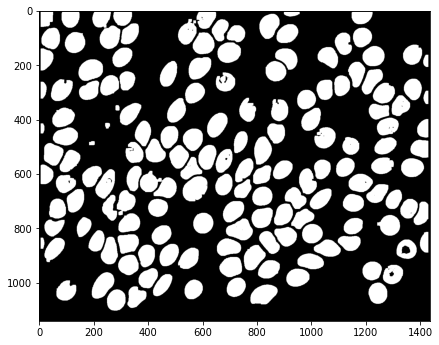

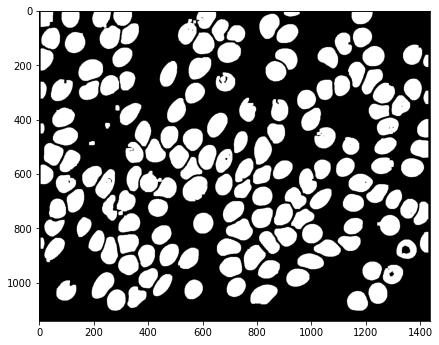

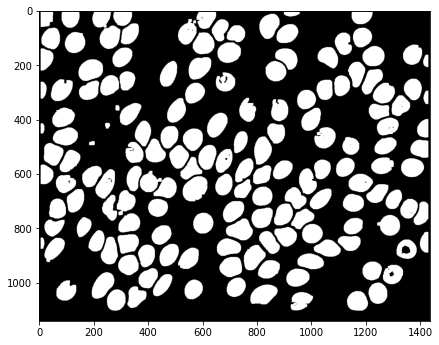

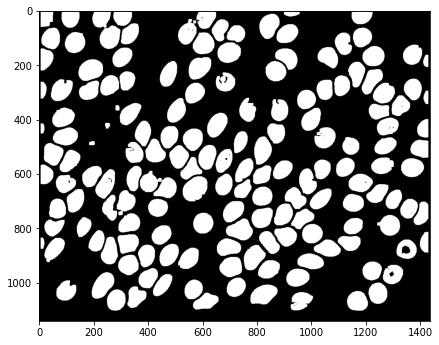

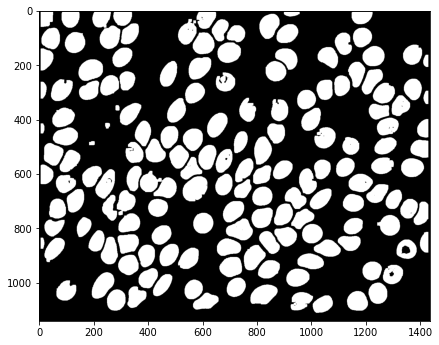

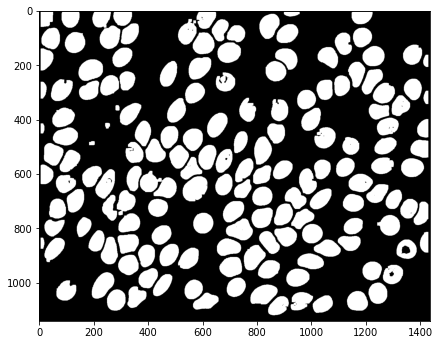

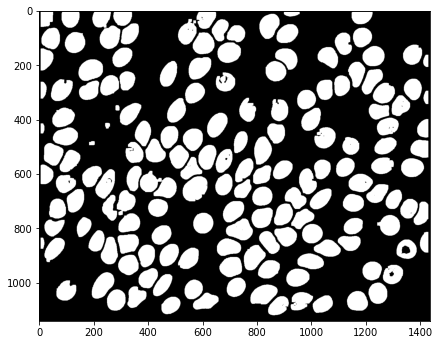

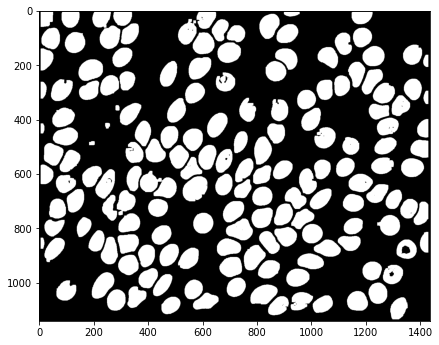

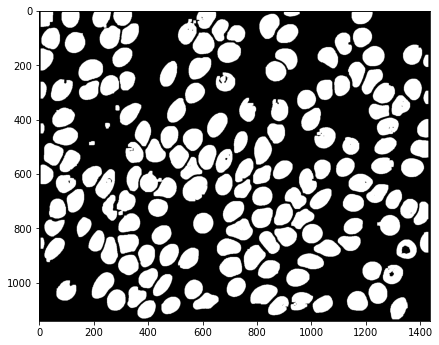

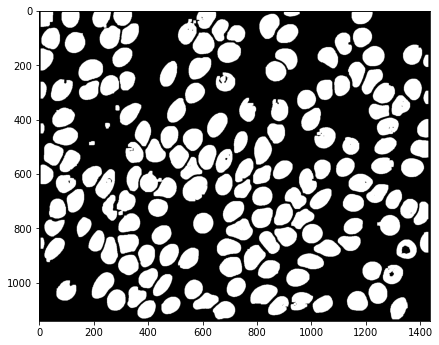

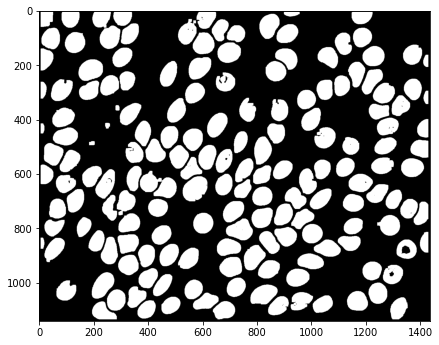

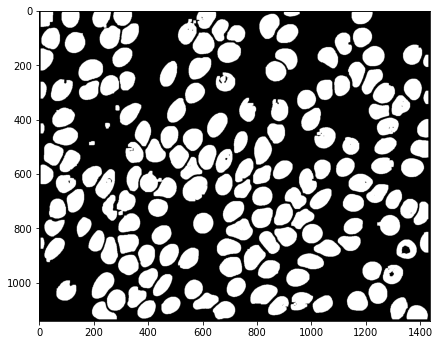

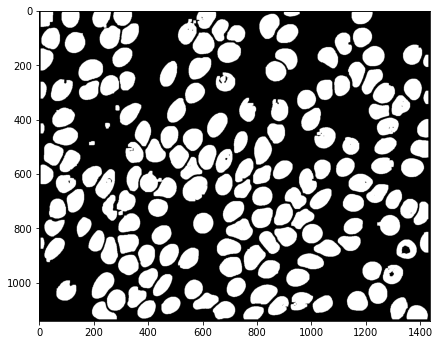

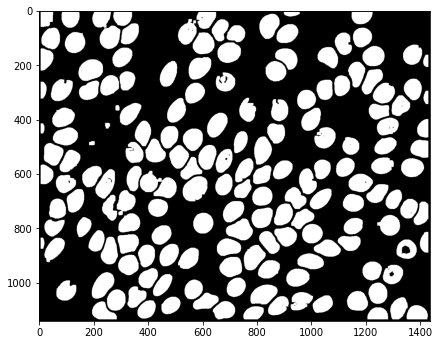

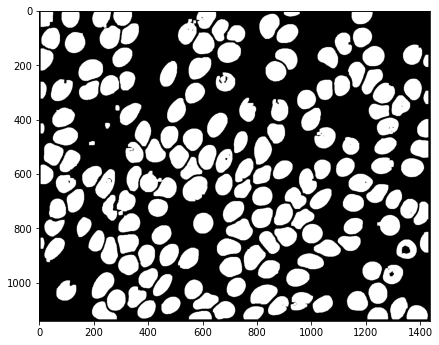

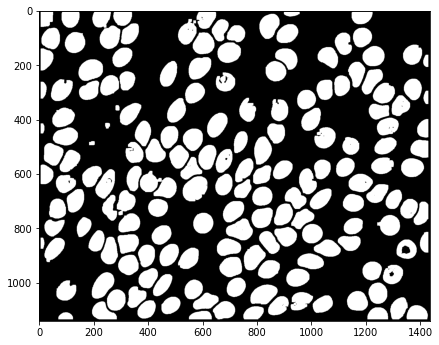

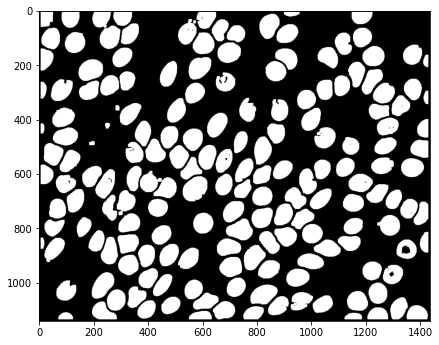

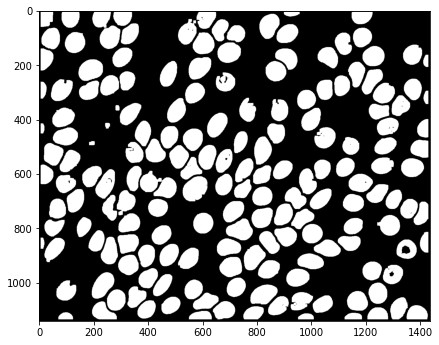

El número de células totales es de aproximadamente: 175


In [9]:
# Custom kernel.
kernel = np.ones((13,13), dtype=int)

# Contar las células
no_cells = countCells(newImg, kernel)

# Imprimir resultado
print("El número de células totales es de aproximadamente: " + str(no_cells))